# Model Selection through Cross Validation

In this example we are trying to understand the importance of cross validation and how it is used to select the better model.

We are considering a classification problem here where our dependent(y) variable if 'Purchased' and we have considered our independent(x) variables are 'Age' and 'Estimated Salary'. For the sake of simplicity we have not considered the other features of the dataset.

We have a task where we have to predict the 'Purchased' flag of the given dataset for the corresponding features.

First, we import the basic libraries that we need to do our analysis

In [1]:
import pandas as pd
import numpy as np

In [26]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

After we have imported our libraries, we should now try to read the dataset

In [2]:
df = pd.read_csv('Purchased_Dataset.csv')

Let's take a look at how our dataset looks and what are the features

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


To start off our analysis we define the X and y or our independent and dependent variables

In [4]:
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

Once we have the X and y variables defined we should try to split the data into test and train datasets to do our further analysis. We will be using the 'train_test_split' functionality of 'sklearn' for this purpose

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

Once the dataset has been split into the training and testing datasets, we will now move towards fitting a model on the training datasets.

Please Note: Random State has been specified as '101'
    
Random State signifies that out of the entire dataset, the training and testing datasets will be selected in a randomized manner.
For a different value of Random State, our model could perform at a different level of accuracy.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

We have selected the K-nearest neighbours as our model for solving this classification problem and have fit the model in the above step

In [11]:
predictions = knn.predict(X_test)

Once the model is fit, we are now predicting out Y values depending on the X_test values in the above step

In [12]:
from sklearn import metrics
metrics.accuracy_score(y_test, predictions)

0.82

Once we have our predictions, we are testing the accuracy of the model. We are getting an accuracy of 82% which is decent. 

But what would happen if we changed the Random State while spliting the data? 

We would be trying that out in the below steps where we set Random State as 10 while splitting the data

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
predictions = knn.predict(X_test)

In [16]:
from sklearn import metrics
metrics.accuracy_score(y_test, predictions)

0.87

Seems like a Random State value of 10 gave us a better accuracy i.e. 87% !

But that brings us to the question that what is the value of Random State that we can be use and how can be sure of our accuracy of the model?

Here we see that when the train and test datasets are selected in a different manner the accuracy varies.

Hence we should use the technique of cross validation where each of the data points are used for training and testing the data

The code below implements cross validation on the same algorithm and prints out its mean accuracy.

Note that the mean accuracy is 77.4% of the KNN algorith after we use cross validation

In [17]:
knn = KNeighborsClassifier(n_neighbors=5)

In [19]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean())

0.7745366463509923


The picture below is a representation of how cross validation happens. 

(Picture Source: Analytics Vidhya)

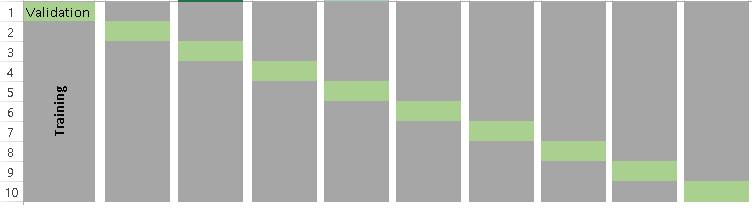

In the code below we have implemented cross validation after using Logistic Regression on the same dataset.

In [21]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

In [27]:
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
predictions = logistic_regression.predict(X_test)

In [25]:
metrics.accuracy_score(y_test, predictions)

0.69

In [28]:
print(cross_val_score(logistic_regression, X, y, cv=5, scoring='accuracy').mean())

0.6577078449757774


Here we see that Random State of 10 produces an accuracy of 69% in Logistic Regression. On the other hand, the mean accuracy after using cross validation on Logistic Regression is 65%

However, cross validation produced an accuracy of 77% in KNN which is better than that of Logistic Regression.

Hence, KNN proves to be the better algorithm in this scenario